# Predicting St. Louis Sales with Economic Indicators

#### This project considers sales data in St. Louis from 2010-2019, and uses this data along with various economic indicators to predict sales after 2019.  all data comes from <a href="https://fred.stlouisfed.org/">https://fred.stlouisfed.org/</a>.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

In [ ]:
df=pd.read_csv('sales_indicators.csv')
#df=df.drop(['year','month'],axis=1)

### Key to dataframe columns:

#### Sales Data: Millions of Dollars, Monthly, Seasonally Adjusted

RSAFS:	  Retail Trade and Food Services

RSFSXMV:	  Retail Trade and Food Services, Excluding Motor Vehicle and Parts Dealers

RSHPCS:	  Health and Personal Care Stores

RSGASS:	  Gasoline Stations

RSCCAS:	  Clothing and Clothing Accessory Stores

RSSGHBMS:  Sporting Goods, Hobby, Musical Instrument, and Book Stores

RSGMS:	  General Merchandise Stores

RSDSELD:	  Department Stores

RSMSR:	   Miscellaneous Store Retailers

RSNSR:	  Nonstore Retailers

RSFSDP:	  Food Services and Drinking Places

RSXFS:	  Retail Trade

#### Indicator Data

break_inflate10: 10 year inflation rate

cpi: Consumer Price Index

employ_rate: Employment Rate Ages 15-64

indust_prod: Industrial Production

Mortgage_rate30: Mortgage Rate






In [ ]:
df.head()

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,RSFSDP,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,year,month
0,2003-01-01,295248,225575,15441,23073,14565,5794,37740,17807,8565,16434,28018,267230,1.754286,0.442233,71.590301,91.2395,5.9160,2003,1
1,2003-02-01,291167,224632,15534,23885,14142,5576,38030,17670,8372,16933,27979,263188,1.912632,0.770501,71.520526,91.3384,5.8425,2003,2
2,2003-03-01,296325,227697,15677,23968,14465,5660,38391,17763,8405,16764,28505,267820,1.862857,0.600765,71.396225,91.0690,5.7450,2003,3
3,2003-04-01,295600,226020,15705,22581,14434,5709,38321,17687,8359,16593,28403,267197,1.774762,-0.217155,71.378556,90.4913,5.8125,2003,4
4,2003-05-01,296410,226750,15791,21810,14651,5748,38483,17838,8525,16722,29048,267362,1.660952,-0.163221,71.213061,90.4697,5.4840,2003,5


In [ ]:
#Due to the economic turmoil in 2008 and beginning in 2020, we consider the data from 2010-2019
df[df['date']=='2010-01-01']

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,RSFSDP,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,year,month
84,2010-01-01,346043,289245,21187,37399,17351,6507,49844,15585,8363,27236,37700,308343,2.358421,0.341747,66.750593,89.1936,5.03,2010,1


In [ ]:
df[df['date']=='2020-01-01']

,date,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,RSFSDP,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,year,month
204,2020-01-01,524063,421133,28983,43351,23009,6702,60118,10902,11463,64673,67950,456113,1.720952,0.387977,71.772376,101.303,3.624,2020,1


In [ ]:
df_adj=df.loc[84:203]

In [ ]:
df_adj.set_index('date')

,RSAFS,RSFSXMV,RSHPCS,RSGASS,RSCCAS,RSSGHBMS,RSGMS,RSDSELD,RSMSR,RSNSR,RSFSDP,RSXFS,break_inflate10,cpi,employ_rate,indust_prod,mortgage_rate30,year,month
date,,,,,,,,,,,,,,,,,,,
2010-01-01,346043,289245,21187,37399,17351,6507,49844,15585,8363,27236,37700,308343,2.358421,0.341747,66.750593,89.1936,5.0300,2010,1
2010-02-01,346835,291032,21199,36950,17402,6412,50538,15507,8251,27249,38267,308568,2.272105,0.024921,66.709214,89.5089,4.9900,2010,2
2010-03-01,354360,293463,21363,37123,17908,6515,50095,15479,8705,27852,38376,315984,2.219130,0.410628,66.732157,90.1449,4.9675,2010,3
2010-04-01,357461,295638,21471,37218,17724,6409,50650,15744,8567,27767,38658,318803,2.345909,0.173688,66.868325,90.4740,5.0980,2010,4
2010-05-01,354255,292684,21399,36606,17656,6496,50023,15399,8632,27752,38695,315560,2.113000,0.077520,66.755470,91.7131,4.8875,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,521158,415426,28580,42735,22615,6740,60074,11369,11045,63727,65191,455967,1.586364,-0.005067,71.435858,102.9086,3.6160,2019,8
2019-09-01,517755,414270,28600,42589,22376,6698,59377,11042,10997,63995,65707,452048,1.587000,0.078345,71.722503,102.5790,3.6050,2019,9
2019-10-01,519519,416179,28809,43254,22417,6742,59662,10969,11156,64346,66068,453451,1.560909,0.228619,71.687213,101.7775,3.6880,2019,10


<AxesSubplot:>

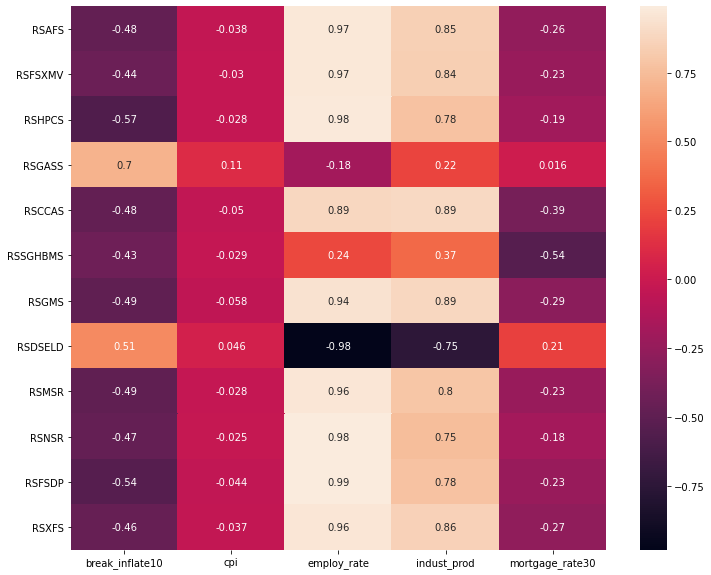

In [ ]:
#Consider a heatmap of the data to see which sales and indicators have high correlation
plt.figure(figsize=(12,10))
sns.heatmap(df_adj.corr().iloc[:12,12:],annot=True)

### It looks like employment rate has a high correlation with many of the sales data.  We'll start with the highest, RSFSDP.

In [ ]:
#testing RSFSDP by itself
#Split targets and features
Y = df_adj['RSFSDP'] 
X = df_adj[['year','month']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=42)

#scaler=StandardScaler()

#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

#Count features for modelization
X_num_columns= len(X.columns)

In [ ]:
#Define model
model1 = Sequential()

model1.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model1.add(Dense(64,
                activation='relu'))
model1.add(Dropout(0.2))

#model1.add(Dense(30,
#                activation='relu'))
#model1.add(Dropout(0.2))

#model1.add(Dense(7,
#                activation='relu'))
#model1.add(Dropout(0.2))

model1.add(Dense(1,
                activation='linear'))

model1.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")


Model Created


In [ ]:
#Fit model to training data
model1.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")

Epoch 1/128
6/6 [==============================] - 1s 3ms/step - loss: 2679710464.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 2646963456.0000
Epoch 3/128
6/6 [==============================] - 0s 3ms/step - loss: 2622047744.0000
Epoch 4/128
6/6 [==============================] - 0s 2ms/step - loss: 2592865536.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 2567481600.0000
Epoch 6/128
6/6 [==============================] - 0s 2ms/step - loss: 2540033536.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 2501279744.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 2455011840.0000
Epoch 9/128
6/6 [==============================] - 0s 2ms/step - loss: 2408969472.0000
Epoch 10/128
6/6 [==============================] - 0s 1ms/step - loss: 2356516608.0000
Epoch 11/128
6/6 [==============================] - 0s 1ms/step - loss: 2292388608.0000
Epoch 12/128
6/6 [=======================

6/6 [==============================] - 0s 1ms/step - loss: 149248112.0000
Epoch 96/128
6/6 [==============================] - 0s 2ms/step - loss: 115408024.0000
Epoch 97/128
6/6 [==============================] - 0s 1ms/step - loss: 122655232.0000
Epoch 98/128
6/6 [==============================] - 0s 2ms/step - loss: 115096808.0000
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 123562560.0000
Epoch 100/128
6/6 [==============================] - 0s 2ms/step - loss: 99302264.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 129160192.0000
Epoch 102/128
6/6 [==============================] - 0s 2ms/step - loss: 112467608.0000
Epoch 103/128
6/6 [==============================] - 0s 2ms/step - loss: 111448504.0000
Epoch 104/128
6/6 [==============================] - 0s 1ms/step - loss: 111106592.0000
Epoch 105/128
6/6 [==============================] - 0s 1ms/step - loss: 116774080.0000
Epoch 106/128
6/6 [==============================] 

In [ ]:
# sum of squared errors over the sample size of 24

print(model1.metrics_names)

loss = model1.evaluate(X_test, y_test)

print(np.sqrt(loss))

['loss']
1/1 [==============================] - 0s 162ms/step - loss: 56216308.0000
7497.753530224903


In [ ]:
#loss-stdev of data/stdev of data
(df_adj['RSFSDP'].std()-np.sqrt(loss))/df_adj['RSFSDP'].std()

0.09721079800952674

#### Now we'll try with the employment rate indicator

In [ ]:
###############testing RSFSDP with employment rate indicator
#Split targets and features
Y = df_adj['RSFSDP'] 
X = df_adj[['year','month','employ_rate']]

In [ ]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=43)

#scaler=StandardScaler()

#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

#Count features for modelization
X_num_columns= len(X.columns)

In [ ]:
X_num_columns

3

In [ ]:
model2 = Sequential()

model2.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model2.add(Dense(64,
                activation='relu'))
model2.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model2.add(Dense(1,
                activation='linear'))

model2.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")


Model Created


In [ ]:
#Fit model to training data
model2.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")

Epoch 1/128
6/6 [==============================] - 0s 1ms/step - loss: 2665844992.0000
Epoch 2/128
6/6 [==============================] - 0s 2ms/step - loss: 2633229056.0000
Epoch 3/128
6/6 [==============================] - 0s 1ms/step - loss: 2604995328.0000
Epoch 4/128
6/6 [==============================] - 0s 1ms/step - loss: 2578332928.0000
Epoch 5/128
6/6 [==============================] - 0s 2ms/step - loss: 2553480960.0000
Epoch 6/128
6/6 [==============================] - 0s 1ms/step - loss: 2535589120.0000
Epoch 7/128
6/6 [==============================] - 0s 2ms/step - loss: 2499253504.0000
Epoch 8/128
6/6 [==============================] - 0s 2ms/step - loss: 2470792192.0000
Epoch 9/128
6/6 [==============================] - 0s 1ms/step - loss: 2421609216.0000
Epoch 10/128
6/6 [==============================] - 0s 2ms/step - loss: 2373599488.0000
Epoch 11/128
6/6 [==============================] - 0s 2ms/step - loss: 2314885120.0000
Epoch 12/128
6/6 [=======================

6/6 [==============================] - 0s 2ms/step - loss: 147125936.0000
Epoch 96/128
6/6 [==============================] - 0s 1ms/step - loss: 122599296.0000
Epoch 97/128
6/6 [==============================] - 0s 2ms/step - loss: 121555264.0000
Epoch 98/128
6/6 [==============================] - 0s 1ms/step - loss: 97570240.0000
Epoch 99/128
6/6 [==============================] - 0s 1ms/step - loss: 102185304.0000
Epoch 100/128
6/6 [==============================] - 0s 1ms/step - loss: 108137152.0000
Epoch 101/128
6/6 [==============================] - 0s 1ms/step - loss: 111773088.0000
Epoch 102/128
6/6 [==============================] - 0s 1ms/step - loss: 119598424.0000
Epoch 103/128
6/6 [==============================] - 0s 1ms/step - loss: 103303656.0000
Epoch 104/128
6/6 [==============================] - 0s 1ms/step - loss: 129429888.0000
Epoch 105/128
6/6 [==============================] - 0s 2ms/step - loss: 139621488.0000
Epoch 106/128
6/6 [==============================] 

In [ ]:
# sum of squared errors over the sample size of 

print(model2.metrics_names)

loss = model2.evaluate(X_test, y_test)

print(np.sqrt(loss))

['loss']
1/1 [==============================] - 0s 89ms/step - loss: 68347968.0000
8267.282987777786


In [ ]:
#loss-stdev of data/stdev of data
(df_adj['RSFSDP'].std()-np.sqrt(loss))/df_adj['RSFSDP'].std()

0.00455332639596072

#### The employment rate indicator did not improve the loss.

### Now RSAFS is tested:

In [ ]:
###############testing RSAFS
#Split targets and features
Y = df['RSAFS'] 
X = df[['year','month']]

In [ ]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=44)

#Count features for modelization
X_num_columns= len(X.columns)

In [ ]:
model3 = Sequential()

model3.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model3.add(Dense(64,
                activation='relu'))
model3.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model3.add(Dense(1,
                activation='linear'))

model3.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")


Model Created


In [ ]:
#Fit model to training data
model3.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")

Epoch 1/128
12/12 [==============================] - 0s 2ms/step - loss: 186783531008.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 185902481408.0000
Epoch 3/128
12/12 [==============================] - 0s 2ms/step - loss: 184753569792.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 183370170368.0000
Epoch 5/128
12/12 [==============================] - 0s 2ms/step - loss: 181325201408.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 178631409664.0000
Epoch 7/128
12/12 [==============================] - 0s 2ms/step - loss: 174917091328.0000
Epoch 8/128
12/12 [==============================] - 0s 2ms/step - loss: 170227220480.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 164634640384.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 157545168896.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 149668216832.00

12/12 [==============================] - 0s 1ms/step - loss: 10020170752.0000
Epoch 92/128
12/12 [==============================] - 0s 1ms/step - loss: 8851921920.0000
Epoch 93/128
12/12 [==============================] - 0s 1ms/step - loss: 9710005248.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 9034240000.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 9441166336.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 9514203136.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 9204185088.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 10477289472.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 10008182784.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 9745736704.0000
Epoch 101/128
12/12 [==============================] - 0s 997us/step - loss: 10337438720.0000
Epoch 102/128
1

In [ ]:
print(model3.metrics_names)

loss = model3.evaluate(X_test, y_test)

print(np.sqrt(loss))

['loss']
2/2 [==============================] - 0s 2ms/step - loss: 6112480768.0000
78182.35586115322


In [ ]:
#loss-stdev of data/stdev of data
(df['RSAFS'].std()-np.sqrt(loss))/df['RSAFS'].std()

0.11407395937503012

In [ ]:
###############testing RSAFS with employee rate
#Split targets and features
Y = df['RSAFS'] 
#X = df[['year','month','mortgage_rate30']]
X = df[['year','month','employ_rate']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=45)

#Count features for modelization
X_num_columns= len(X.columns)

model4 = Sequential()

model4.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model4.add(Dense(64,
                activation='relu'))
model4.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model4.add(Dense(1,
                activation='linear'))

model4.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model4.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 1ms/step - loss: 187585806336.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 186804338688.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 186005028864.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 184904417280.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 183402299392.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 181316108288.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 178537873408.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 174851342336.0000
Epoch 9/128
12/12 [==============================] - 0s 2ms/step - loss: 170219880448.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 164846632960.0000
Epoch 11/128
12/12 [==============================] - 0s 2ms/step - loss: 158260559872.00

12/12 [==============================] - 0s 1ms/step - loss: 10127169536.0000
Epoch 92/128
12/12 [==============================] - 0s 1ms/step - loss: 11839511552.0000
Epoch 93/128
12/12 [==============================] - 0s 1ms/step - loss: 10729475072.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 9864607744.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 9712652288.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 10483290112.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 10332134400.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 10035003392.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 10016086016.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 10186317824.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 10843490304.0000
Epoch 102/12

In [ ]:
loss = model4.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 3ms/step - loss: 6084425728.0000
78002.72897790179


In [ ]:
#loss-stdev of data/stdev of data
(df['RSAFS'].std()-np.sqrt(loss))/df['RSAFS'].std()

0.11610940754892962

#### This is a small improvement, but possibly not significant enough.

In [ ]:
###############testing RSAFS with industrial production
#Split targets and features
Y = df['RSAFS'] 
#X = df[['year','month','mortgage_rate30']]
X = df[['year','month','indust_prod']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True,random_state=46)

#Count features for modelization
X_num_columns= len(X.columns)

model5 = Sequential()

model5.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model5.add(Dense(64,
                activation='relu'))
model5.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model5.add(Dense(1,
                activation='linear'))

model5.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model5.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 1ms/step - loss: 182930210816.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 182348087296.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 181706424320.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 180946927616.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 179964362752.0000
Epoch 6/128
12/12 [==============================] - 0s 2ms/step - loss: 178442158080.0000
Epoch 7/128
12/12 [==============================] - 0s 2ms/step - loss: 176622813184.0000
Epoch 8/128
12/12 [==============================] - 0s 2ms/step - loss: 174338473984.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 171029430272.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 167208632320.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 162940076032.00

12/12 [==============================] - 0s 1ms/step - loss: 11413402624.0000
Epoch 92/128
12/12 [==============================] - 0s 1ms/step - loss: 9444832256.0000
Epoch 93/128
12/12 [==============================] - 0s 1ms/step - loss: 10701474816.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 9808681984.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 11388667904.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 10060769280.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 11244768256.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 11131839488.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 10972316672.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 10498329600.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 11726553088.0000
Epoch 102/12

In [ ]:
loss = model5.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 2ms/step - loss: 8675052544.0000
93139.96212152977


In [ ]:
#loss-stdev of data/stdev of data
(df['RSAFS'].std()-np.sqrt(loss))/df['RSAFS'].std()

-0.055418667772406574

This made it worse...

In [ ]:
###############testing RSAFS with industrial production and employee rate
#Split targets and features
Y = df['RSAFS'] 
#X = df[['year','month','mortgage_rate30']]
X = df[['year','month','indust_prod','employ_rate']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=47)

#Count features for modelization
X_num_columns= len(X.columns)

model6 = Sequential()

model6.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model6.add(Dense(64,
                activation='relu'))
model6.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model6.add(Dense(1,
                activation='linear'))

model6.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model6.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 2ms/step - loss: 185290604544.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 184368545792.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 183261790208.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 181573632000.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 179305152512.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 175940878336.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 171610537984.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 165581815808.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 157988356096.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 149275525120.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 137713729536.00

12/12 [==============================] - 0s 1ms/step - loss: 8592148480.0000
Epoch 92/128
12/12 [==============================] - 0s 1ms/step - loss: 8826728448.0000
Epoch 93/128
12/12 [==============================] - 0s 1ms/step - loss: 8215857152.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 8603870208.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 9037934592.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 8506261504.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 8537143808.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 8230170112.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 9381259264.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 8637696000.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 8407456768.0000
Epoch 102/128
12/12 [

In [ ]:
loss = model6.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 2ms/step - loss: 9706444800.0000
98521.29109994449


In [ ]:
#loss-stdev of data/stdev of data
(df['RSAFS'].std()-np.sqrt(loss))/df['RSAFS'].std()

-0.11639738122552974

This is even worse.

## RSHPCS

In [ ]:
#Split targets and features
Y = df['RSHPCS'] 
X = df[['year','month']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=48)

#Count features for modelization
X_num_columns= len(X.columns)

model7 = Sequential()

model7.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model7.add(Dense(64,
                activation='relu'))
model7.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model7.add(Dense(1,
                activation='linear'))

model7.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model7.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 1ms/step - loss: 549440576.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 500699616.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 452864288.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 400080704.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 335410528.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 257314240.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 181322208.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 113499288.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 60975700.0000
Epoch 10/128
12/12 [==============================] - 0s 2ms/step - loss: 33870660.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 28893014.0000
Epoch 12/128
12/12 [=============

12/12 [==============================] - 0s 2ms/step - loss: 28026608.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 28410740.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 28422334.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 31949482.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 27385476.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 23926222.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 27521310.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 26799968.0000
Epoch 102/128
12/12 [==============================] - 0s 1ms/step - loss: 25970744.0000
Epoch 103/128
12/12 [==============================] - 0s 1ms/step - loss: 26787110.0000
Epoch 104/128
12/12 [==============================] - 0s 1ms/step - loss: 29085242.0000
Epoch 105/128
12/12 [===================

In [ ]:
loss = model7.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 2ms/step - loss: 21078636.0000
4591.147568963559


In [ ]:
#loss-stdev of data/stdev of data
(df['RSHPCS'].std()-np.sqrt(loss))/df['RSHPCS'].std()

0.013523789094658163

In [ ]:
#Now RSHPCS with employee rate
Y = df['RSHPCS'] 
X = df[['year','month','employ_rate']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=49)

#Count features for modelization
X_num_columns= len(X.columns)

model8 = Sequential()

model8.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model8.add(Dense(64,
                activation='relu'))
model8.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model8.add(Dense(1,
                activation='linear'))

model8.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model8.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 1ms/step - loss: 546763328.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 513658304.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 474615936.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 427419008.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 364942720.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 286956320.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 206759472.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 128588712.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 66816332.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 39763908.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 25375910.0000
Epoch 12/128
12/12 [=============

12/12 [==============================] - 0s 1ms/step - loss: 29769894.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 28472992.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 27602942.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 26619100.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 30728750.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 25982902.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 30314952.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 26044684.0000
Epoch 102/128
12/12 [==============================] - 0s 1ms/step - loss: 28889748.0000
Epoch 103/128
12/12 [==============================] - 0s 2ms/step - loss: 25276342.0000
Epoch 104/128
12/12 [==============================] - 0s 2ms/step - loss: 24808922.0000
Epoch 105/128
12/12 [===================

In [ ]:
loss = model8.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 3ms/step - loss: 21829738.0000
4672.230516573428


In [ ]:
#loss-stdev of data/stdev of data
(df['RSHPCS'].std()-np.sqrt(loss))/df['RSHPCS'].std()

-0.0038980858779375203

#### Not an improvement

## RSNSR

In [ ]:
#Split targets and features
Y = df['RSNSR'] 
X = df[['year','month']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=50)

#Count features for modelization
X_num_columns= len(X.columns)

model9 = Sequential()

model9.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model9.add(Dense(64,
                activation='relu'))
model9.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model9.add(Dense(1,
                activation='linear'))

model9.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model9.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 2ms/step - loss: 2271066112.0000
Epoch 2/128
12/12 [==============================] - 0s 2ms/step - loss: 2201119488.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 2127751680.0000
Epoch 4/128
12/12 [==============================] - 0s 2ms/step - loss: 2042546816.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 1936703104.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 1786540544.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 1605500928.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 1369157888.0000
Epoch 9/128
12/12 [==============================] - 0s 2ms/step - loss: 1141681536.0000
Epoch 10/128
12/12 [==============================] - 0s 2ms/step - loss: 874520640.0000
Epoch 11/128
12/12 [==============================] - 0s 2ms/step - loss: 695577024.0000
Epoch 12/128
12/12 [=

12/12 [==============================] - 0s 1ms/step - loss: 568455936.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 516473376.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 523292224.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 511075328.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 550398272.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 547092224.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 555230144.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 541736512.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 553964160.0000
Epoch 102/128
12/12 [==============================] - 0s 1ms/step - loss: 549365504.0000
Epoch 103/128
12/12 [==============================] - 0s 1ms/step - loss: 541082816.0000
Epoch 104/128
12/12 [=========

In [ ]:
loss = model9.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 2ms/step - loss: 451047264.0000
21237.873339861504


In [ ]:
#loss-stdev of data/stdev of data
(df['RSNSR'].std()-np.sqrt(loss))/df['RSNSR'].std()

0.06267465655292094

In [ ]:
#Split targets and features
Y = df['RSNSR'] 
X = df[['year','month','employ_rate']]

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=51)

#Count features for modelization
X_num_columns= len(X.columns)

model10 = Sequential()

model10.add(Dense(128,
                activation='relu',
                input_dim = X_num_columns))

model10.add(Dense(64,
                activation='relu'))
model10.add(Dropout(0.2))

#model.add(Dense(30,
#                activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(7,
#                activation='relu'))
#model.add(Dropout(0.2))

model10.add(Dense(1,
                activation='linear'))

model10.compile(optimizer='adam', loss='mean_squared_error')
print("Model Created")




Model Created


In [ ]:
#Fit model to training data
model10.fit(X_train, y_train, epochs=128, batch_size=16)

print("Training completed")


Epoch 1/128
12/12 [==============================] - 0s 2ms/step - loss: 2319257856.0000
Epoch 2/128
12/12 [==============================] - 0s 1ms/step - loss: 2203901696.0000
Epoch 3/128
12/12 [==============================] - 0s 1ms/step - loss: 2088746240.0000
Epoch 4/128
12/12 [==============================] - 0s 1ms/step - loss: 1938533248.0000
Epoch 5/128
12/12 [==============================] - 0s 1ms/step - loss: 1751086848.0000
Epoch 6/128
12/12 [==============================] - 0s 1ms/step - loss: 1516547072.0000
Epoch 7/128
12/12 [==============================] - 0s 1ms/step - loss: 1267467008.0000
Epoch 8/128
12/12 [==============================] - 0s 1ms/step - loss: 1006710848.0000
Epoch 9/128
12/12 [==============================] - 0s 1ms/step - loss: 782250048.0000
Epoch 10/128
12/12 [==============================] - 0s 1ms/step - loss: 685510272.0000
Epoch 11/128
12/12 [==============================] - 0s 1ms/step - loss: 559218112.0000
Epoch 12/128
12/12 [==

12/12 [==============================] - 0s 1ms/step - loss: 542090624.0000
Epoch 94/128
12/12 [==============================] - 0s 1ms/step - loss: 543962880.0000
Epoch 95/128
12/12 [==============================] - 0s 1ms/step - loss: 569753088.0000
Epoch 96/128
12/12 [==============================] - 0s 1ms/step - loss: 565786048.0000
Epoch 97/128
12/12 [==============================] - 0s 1ms/step - loss: 534248640.0000
Epoch 98/128
12/12 [==============================] - 0s 1ms/step - loss: 563132416.0000
Epoch 99/128
12/12 [==============================] - 0s 1ms/step - loss: 576232384.0000
Epoch 100/128
12/12 [==============================] - 0s 1ms/step - loss: 554646656.0000
Epoch 101/128
12/12 [==============================] - 0s 1ms/step - loss: 564728576.0000
Epoch 102/128
12/12 [==============================] - 0s 1ms/step - loss: 570209856.0000
Epoch 103/128
12/12 [==============================] - 0s 1ms/step - loss: 549280448.0000
Epoch 104/128
12/12 [=========

In [ ]:
loss = model10.evaluate(X_test, y_test)

print(np.sqrt(loss))

2/2 [==============================] - 0s 2ms/step - loss: 408377824.0000
20208.360250153895


In [ ]:
#loss-stdev of data/stdev of data
(df['RSNSR'].std()-np.sqrt(loss))/df['RSNSR'].std()

0.10811181944353175

#### A minor improvement!